| **Inicio** | **atrás 24** | **Siguiente 26** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./24.Impureza_Gini.ipynb)| [⏩](./26.Matriz_Covarianza.ipynb)|

# **25. Regresión Logística**

## **Introducción**

![regresion logistica](../imagenes%20Machine_Learning/logis.jpg "regresion logistica")

La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria, donde el objetivo es predecir la probabilidad de que una instancia pertenezca a una de dos clases posibles. La regresión logística se basa en la función sigmoidea para calcular la probabilidad de una instancia que pertenezca a la clase positiva.

Aquí hay un ejemplo de Regresión Logística con código y gráfica:

Supongamos que tenemos un conjunto de datos que contiene la edad de una persona y si esa persona compró o no un determinado producto. Queremos usar la regresión logística para predecir si una persona comprará o no el producto basándonos en su edad.

Primero, importamos las bibliotecas necesarias y cargamos los datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Cargamos los datos
data = pd.DataFrame({
    'edad': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    'compró': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})


Ahora, graficamos los datos para ver si hay una relación entre la edad y si una persona compró o no el producto:

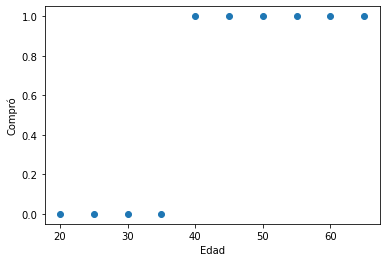

In [2]:
# Graficamos los datos
plt.scatter(data['edad'], data['compró'])
plt.xlabel('Edad')
plt.ylabel('Compró')
plt.show()


La gráfica muestra que las personas mayores son más propensas a comprar el producto que las personas más jóvenes.

Ahora, ajustamos un modelo de regresión logística a los datos y trazamos la función sigmoidea resultante:

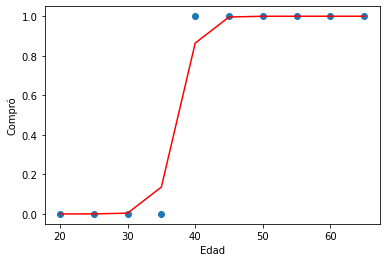

In [3]:
# Creamos una instancia del modelo de regresión logística
lr_model = LogisticRegression()

# Entrenamos el modelo en nuestros datos
lr_model.fit(data[['edad']], data['compró'])

# Graficamos los datos y la función sigmoidea resultante
plt.scatter(data['edad'], data['compró'])
plt.plot(data['edad'], lr_model.predict_proba(data[['edad']])[:, 1], color='red')
plt.xlabel('Edad')
plt.ylabel('Compró')
plt.show()


La gráfica muestra la función sigmoidea resultante de ajustar la regresión logística a los datos. La línea roja representa la probabilidad estimada de que una persona compre el producto en función de su edad.

Con este modelo, podemos hacer predicciones sobre si una persona comprará o no el producto en función de su edad. Por ejemplo, si queremos predecir si una persona de 45 años comprará el producto, podemos hacer lo siguiente:

In [4]:
# Predecimos la probabilidad de que una persona de 45 años compre el producto
edad_nueva = 45
probabilidad = lr_model.predict_proba([[edad_nueva]])[0][1]

print(f"La probabilidad de que una persona de {edad_nueva} años compre el producto es {probabilidad:.2f}")


La probabilidad de que una persona de 45 años compre el producto es 1.00


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## **Contexto**

La regresión logística es una técnica de modelado estadístico que se utiliza para analizar relaciones entre una variable dependiente binaria (0/1, sí/no, verdadero/falso) y un conjunto de variables predictoras continuas o categóricas. Se utiliza comúnmente en problemas de clasificación en los que se intenta predecir si una observación pertenece a una categoría determinada en función de sus características.

Un ejemplo común de uso de regresión logística es la detección de spam en el correo electrónico. Aquí, la variable dependiente sería si el correo electrónico es spam o no (1 si es spam, 0 si no lo es), y las variables predictoras podrían incluir características como el remitente, la línea de asunto, el contenido del mensaje, etc.

Otro ejemplo es el análisis de crédito, donde la variable dependiente podría ser si un cliente es un buen pagador o no (1 si es un buen pagador, 0 si no lo es), y las variables predictoras podrían incluir el historial crediticio del cliente, su ingreso, su empleo, etc.

En resumen, la regresión logística se utiliza en una amplia gama de aplicaciones en las que se busca predecir la probabilidad de pertenecer a una clase determinada en función de las características del objeto de estudio.

## **Función logística estándar**

La función logística estándar es una función matemática que se utiliza en la regresión logística para modelar la probabilidad de que un evento ocurra. Su fórmula es:
​
 $$
\sigma(x) = \frac{1}{1+e^{-x}}
$$


Donde $x$ es una variable de entrada. Esta función tiene un rango de salida entre 0 y 1, lo que la hace adecuada para modelar probabilidades.

A continuación, se presenta un ejemplo de cómo graficar la función logística estándar utilizando Python y la biblioteca Matplotlib:

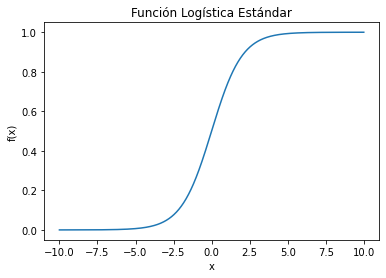

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función logística estándar
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Crear valores de x en un rango de -10 a 10
x = np.linspace(-10, 10, 1000)

# Calcular los valores de la función logística estándar para cada valor de x
y = logistic_function(x)

# Graficar la función logística estándar
plt.plot(x, y)
plt.title("Función Logística Estándar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


La gráfica muestra que la función logística estándar tiene una forma en "S", donde la salida se acerca a 0 cuando $x$ tiende a $-\infty$ y la salida se acerca a 1 cuando $x$ tiende a $\infty$. La función también es diferenciable en cualquier punto, lo que es útil para la optimización de parámetros en la regresión logística.

## **Máxima verosimilitud**

La máxima verosimilitud es una técnica utilizada en la regresión logística para estimar los parámetros del modelo. La idea detrás de la máxima verosimilitud es encontrar los valores de los parámetros que maximizan la probabilidad de observar los datos que tenemos.


/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        12:06:20   Log-Likelihood:            -3.0627e-08
converged:                      False   LL-Null:                       -68.994
Covariance Type:            nonrobust   LLR p-value:                 7.329e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1062   6267.036      0.001      0.999   -1.23e+04    1.23e+04
x1          1933.7842   6.14e+05      0.003      0.997    -1.2e+0

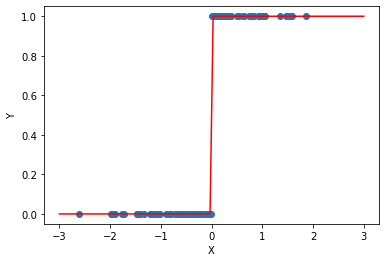

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar datos de ejemplo
np.random.seed(42)
n = 100
x = np.random.normal(size=n)
y = (x > 0).astype(int)

# Ajustar un modelo de regresión logística
x = sm.add_constant(x) # añadir columna de unos para el intercepto
model = sm.Logit(y, x).fit()

# Imprimir los resultados del modelo
print(model.summary())

# Graficar los datos y la curva ajustada por el modelo
plt.scatter(x[:, 1], y)
x_plot = np.linspace(-3, 3, 100)
x_plot = sm.add_constant(x_plot)
y_plot = model.predict(x_plot)
plt.plot(x_plot[:, 1], y_plot, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Este código genera datos de ejemplo de una variable predictora ```x``` y una variable de respuesta binaria ```y```. A continuación, se ajusta un modelo de regresión logística a los datos utilizando el método Logit de ```statsmodels```. Se imprime un resumen de los resultados del modelo utilizando el método ```summary```, que muestra información como los coeficientes de la regresión y el valor de la devianza. Finalmente, se grafican los datos y la curva ajustada por el modelo utilizando la función ```scatter``` y ```plot```, respectivamente.

## **Creación del modelo con Scikit-Learn**

Primero, cargamos las librerías necesarias y los datos que vamos a utilizar. Para este ejemplo, utilizaremos el conjunto de datos "Iris", que es un conjunto de datos clásico en el aprendizaje automático.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargamos los datos
iris = load_iris()
X = iris.data
y = iris.target


A continuación, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba:

In [8]:
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


A continuación, creamos el modelo de regresión logística y lo ajustamos a los datos de entrenamiento:

In [9]:
# Creamos el modelo de regresión logística y lo ajustamos a los datos de entrenamiento
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

Una vez que hemos ajustado el modelo, podemos utilizarlo para hacer predicciones sobre los datos de prueba y evaluar su precisión utilizando una matriz de confusión y un informe de clasificación:

In [10]:
# Hacemos predicciones sobre los datos de prueba y evaluamos el modelo
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Finalmente, podemos visualizar los resultados utilizando un gráfico de dispersión:

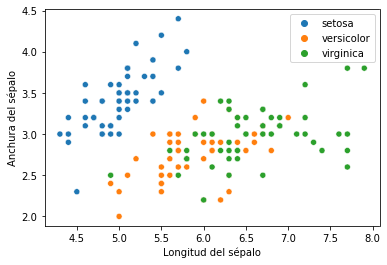

In [11]:
# Visualizamos los resultados utilizando un gráfico de dispersión
sns.scatterplot(x=X[:,0], y=X[:,1], hue=iris.target_names[y])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Anchura del sépalo')
plt.show()


## **Suposiciones**

La Regresión Logística tiene algunas suposiciones que deben cumplirse para que el modelo sea válido y las predicciones sean precisas. Estas suposiciones son:

**1. Linealidad:** La relación entre la variable independiente y la logit transformada de la variable dependiente debe ser lineal.

**2. Independencia:** Las observaciones deben ser independientes entre sí.

**3. Homogeneidad de la varianza:** La varianza de los errores debe ser constante en todas las observaciones.

**4. Ausencia de valores atípicos:** No debe haber valores atípicos en los datos.

Un ejemplo de cómo comprobar estas suposiciones es a través de un gráfico de residuos estandarizados. Si los residuos están distribuidos aleatoriamente alrededor de cero y la varianza es constante, se cumple la suposición de linealidad e independencia. Si la varianza de los residuos no es constante, puede haber un problema de heterocedasticidad. Si hay valores atípicos, los residuos estandarizados serán mayores que 3 o menores que -3.

A continuación, se presenta un ejemplo de cómo comprobar la suposición de linealidad e independencia a través de un gráfico de residuos estandarizados con el conjunto de datos del ejemplo anterior:

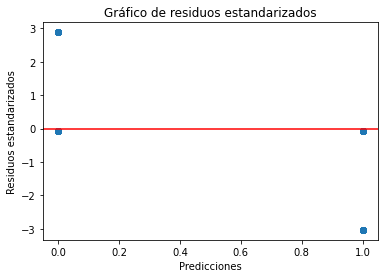

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Crear datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=4, random_state=42)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos estandarizados
residuos = y_test - y_pred
residuos_estandarizados = (residuos - np.mean(residuos)) / np.std(residuos)

# Graficar los residuos estandarizados
plt.scatter(y_pred, residuos_estandarizados)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicciones')
plt.ylabel('Residuos estandarizados')
plt.title('Gráfico de residuos estandarizados')
plt.show()


Este código genera un gráfico de residuos estandarizados que muestra que los residuos están distribuidos aleatoriamente alrededor de cero, lo que sugiere que se cumple la suposición de linealidad e independencia.

Es importante comprobar estas suposiciones antes de utilizar la Regresión Logística para predecir datos nuevos, ya que las predicciones pueden ser imprecisas si estas suposiciones no se cumplen.

| **Inicio** | **atrás 24** | **Siguiente 26** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./24.Impureza_Gini.ipynb)| [⏩](./26.Matriz_Covarianza.ipynb)|